### IMPORTING LIBRARIES

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

## LOAD BANKING DATASET

In [2]:
import pandas as pd
inputFile = "bank.csv"
df = pd.read_csv(inputFile, sep=';')
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


## VIEW DATASET DETAILS

In [3]:
print(df.shape)
print(df.dtypes)

(4521, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


## VISUALIZE THE DATASET

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Plot job columns

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


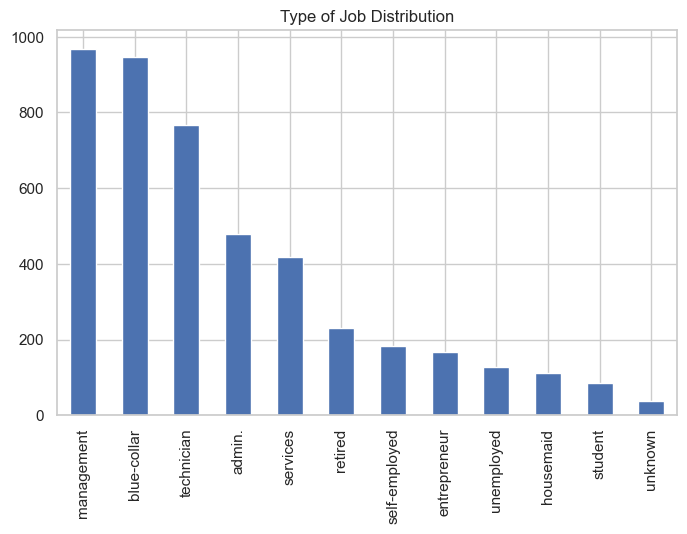

In [13]:
job_count = df['job'].value_counts()
print(job_count)

plt.figure(figsize = (8, 5))
job_count.plot(kind = "bar")
plt.title("Type of Job Distribution")
plt.show()

### Plot default column

no     4445
yes      76
Name: default, dtype: int64


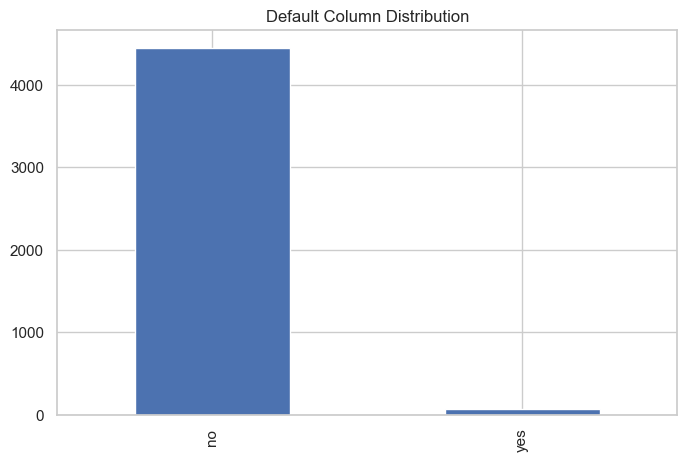

In [14]:
default_count = df['default'].value_counts()
print(default_count)

plt.figure(figsize = (8, 5))
default_count.plot(kind='bar').set(title='Default Column Distribution')
plt.show()

### Plot marital status

married     2797
single      1196
divorced     528
Name: marital, dtype: int64


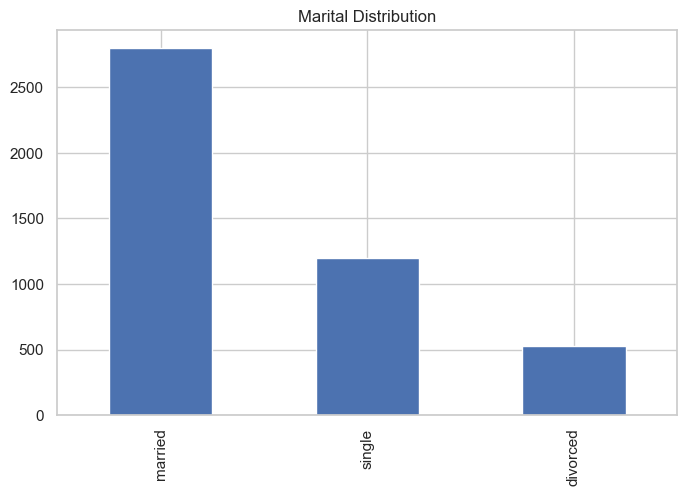

In [15]:
marital_count = df['marital'].value_counts()
print(marital_count)

plt.figure(figsize = (8, 5))
marital_count.plot(kind = "bar").set(title = "Marital Distribution")
plt.show()

### Plot customer has personal loan or not

no     3830
yes     691
Name: loan, dtype: int64


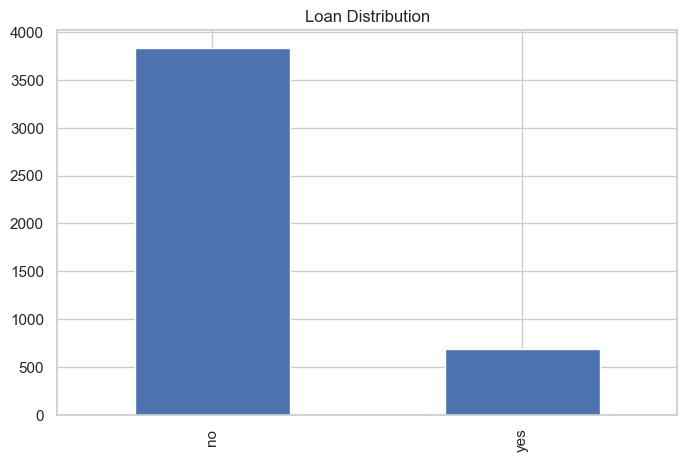

In [16]:
loan_count = df['loan'].value_counts()
print(loan_count)

plt.figure(figsize = (8, 5))
loan_count.plot(kind = "bar").set(title = "Loan Distribution")
plt.show()

### Plot client has housing loan or not

yes    2559
no     1962
Name: housing, dtype: int64


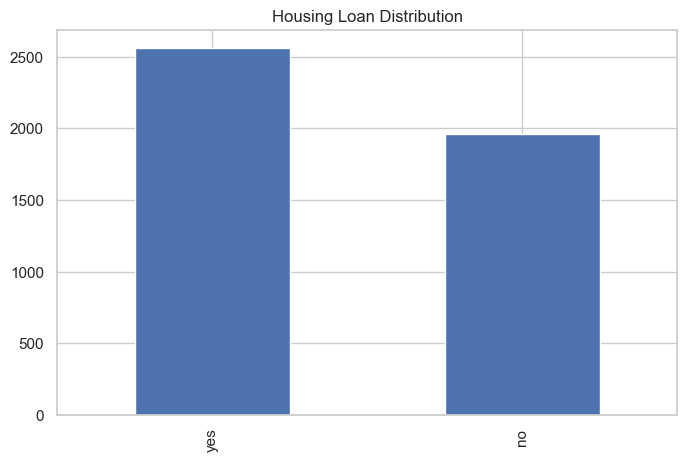

In [17]:
housing_count = df['housing'].value_counts()
print(housing_count)

plt.figure(figsize = (8, 5))
housing_count.plot(kind = "bar").set(title = "Housing Loan Distribution")
plt.show()

### Plot education column

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


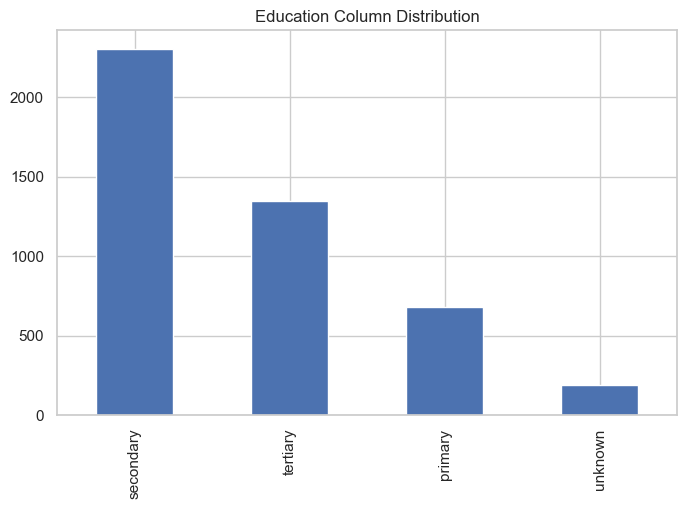

In [18]:
education_count = df['education'].value_counts()
print(education_count)

plt.figure(figsize = (8, 5))
education_count.plot(kind = "bar").set(title = "Education Column Distribution")
plt.show()

### Plot contact column

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


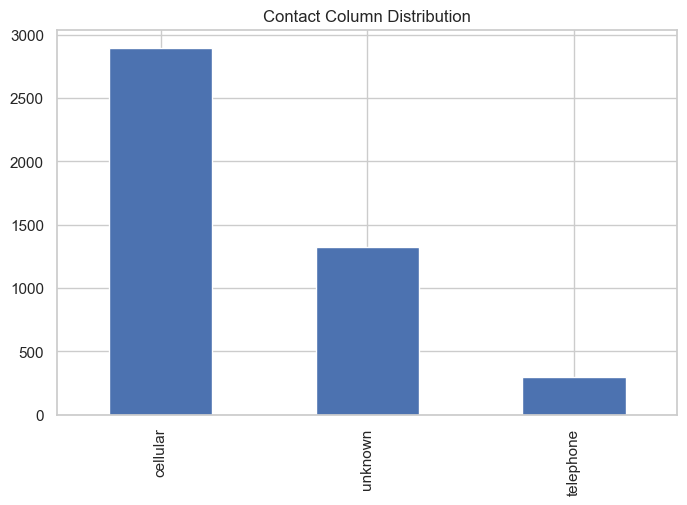

In [19]:
contact_count = df['contact'].value_counts()
print(contact_count)

plt.figure(figsize = (8, 5))
contact_count.plot(kind = "bar").set(title = "Contact Column Distribution")
plt.show()

### Plot month column

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64


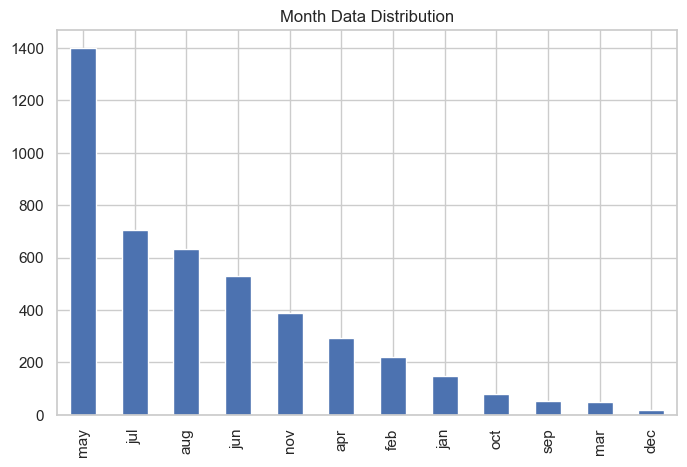

In [20]:
month_count = df['month'].value_counts()
print(month_count)

plt.figure(figsize = (8, 5))
month_count.plot(kind = "bar").set(title = "Month Data Distribution")
plt.show()

### Plot pdays column

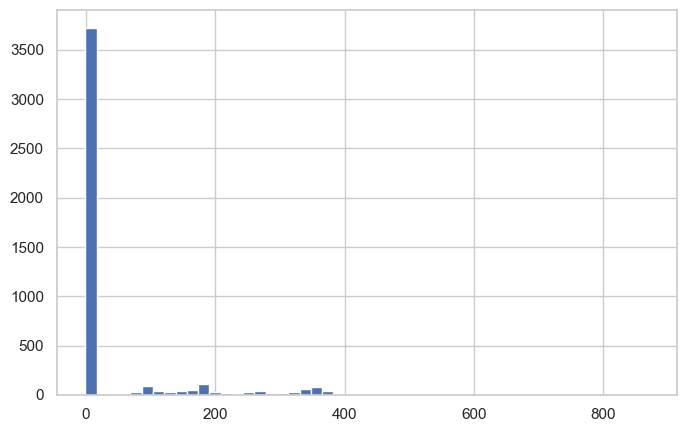

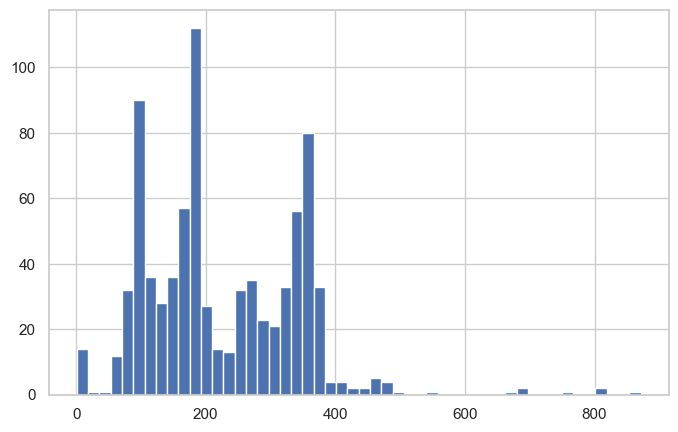

In [21]:
plt.figure(figsize = (8, 5))
df['pdays'].hist(bins = 50)

plt.figure(figsize = (8, 5))
df[df['pdays'] > 0]['pdays'].hist(bins=50)
plt.show()

### Plot target column

no     4000
yes     521
Name: y, dtype: int64


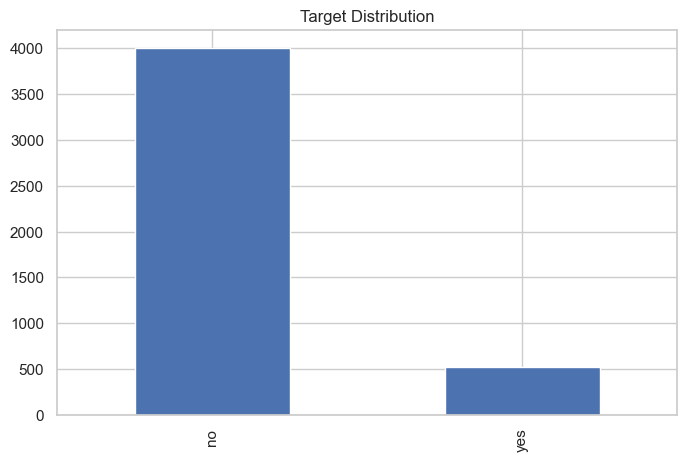

In [23]:
target_count = df['y'].value_counts()
print(target_count)

plt.figure(figsize = (8, 5))
target_count.plot(kind = "bar").set(title = "Target Distribution")
plt.show()

### Plot client has subscribed a term deposit

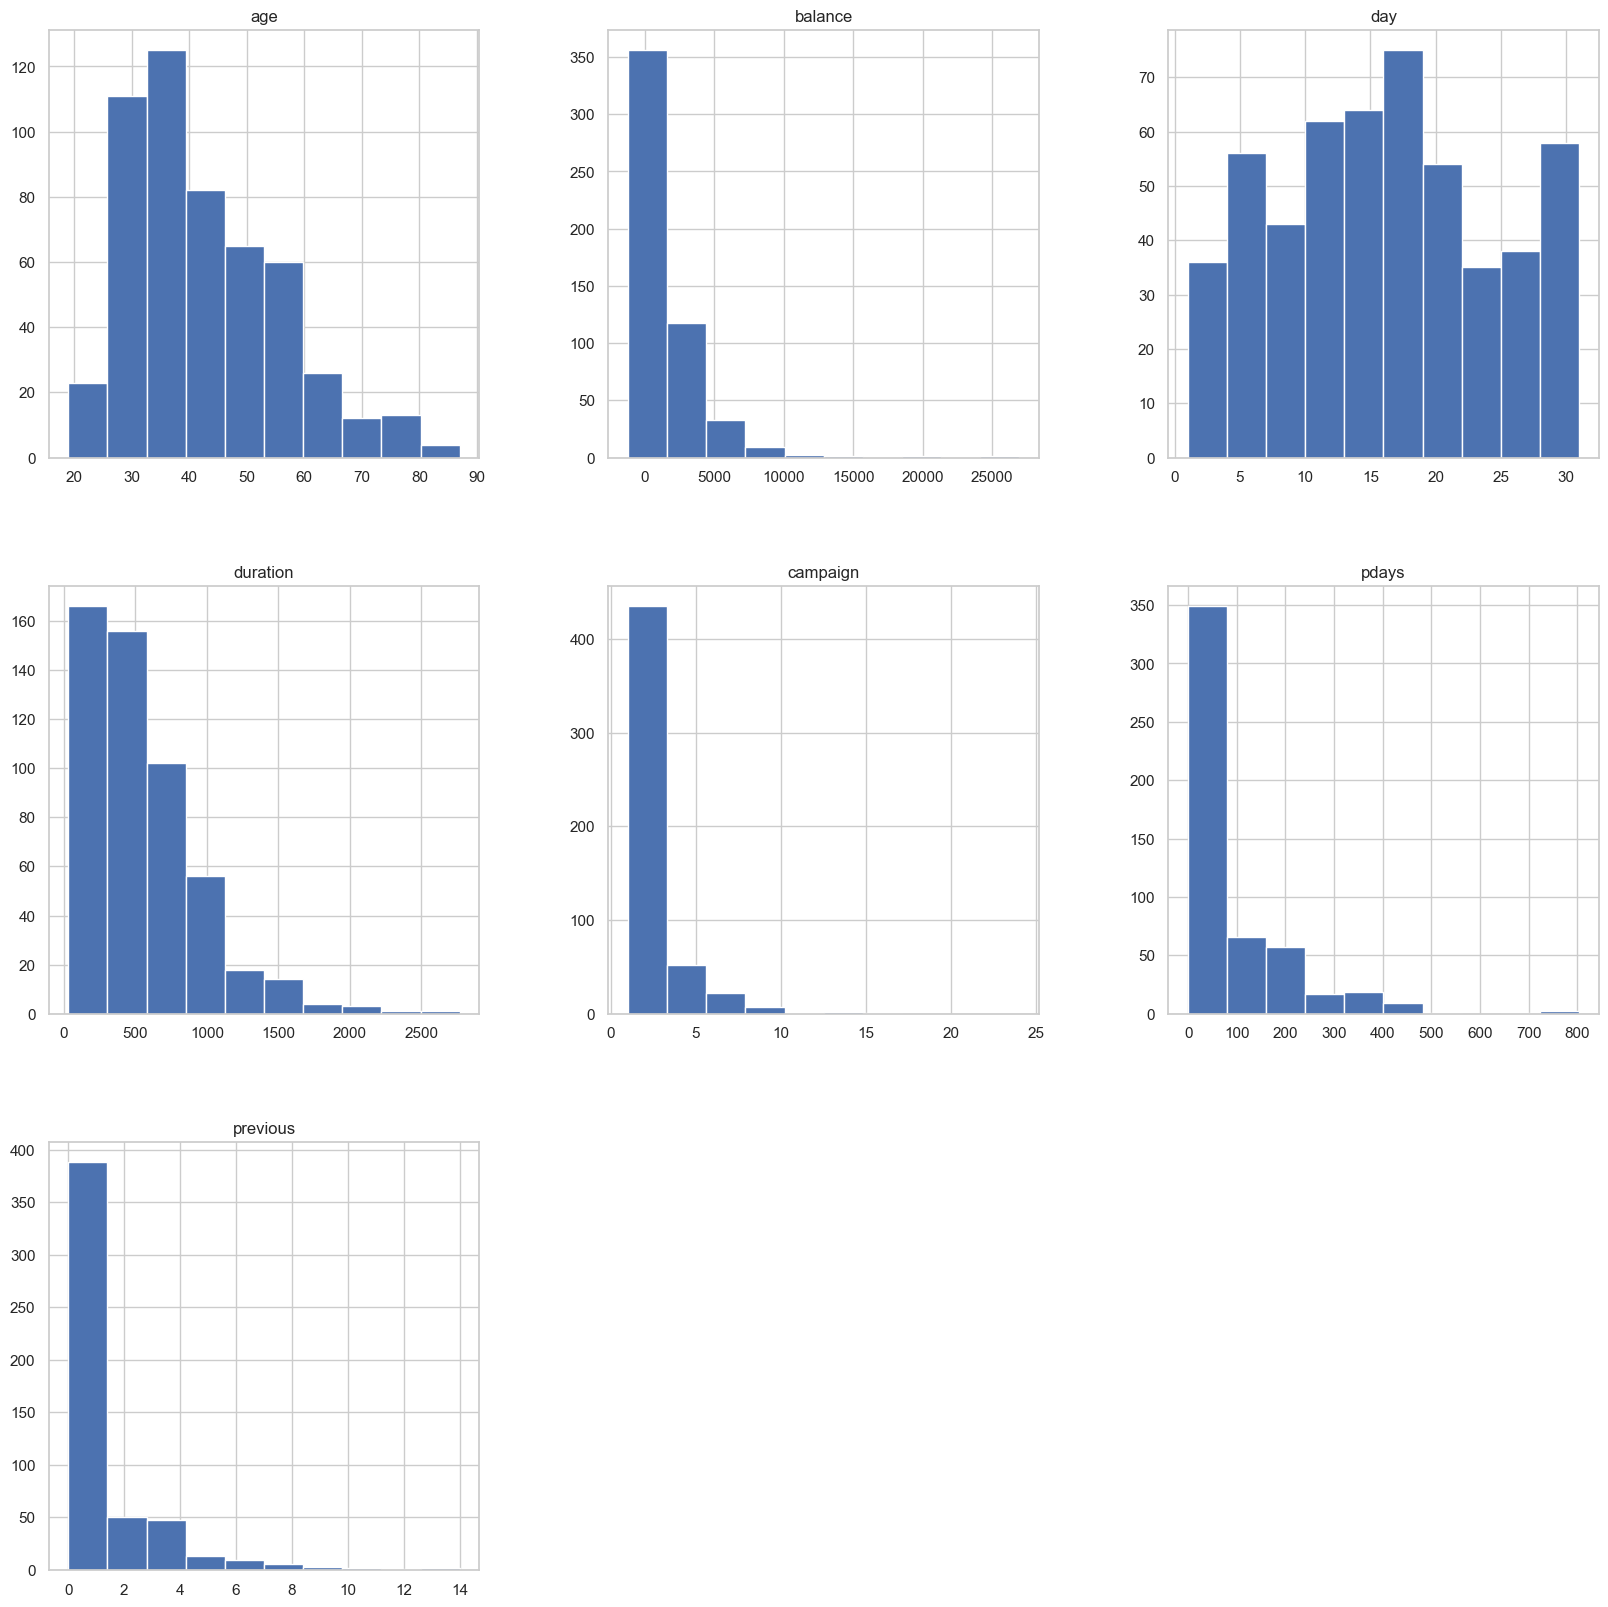

In [25]:
df[df['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposit')
plt.show()

### Plot client has not subscribed a term deposit

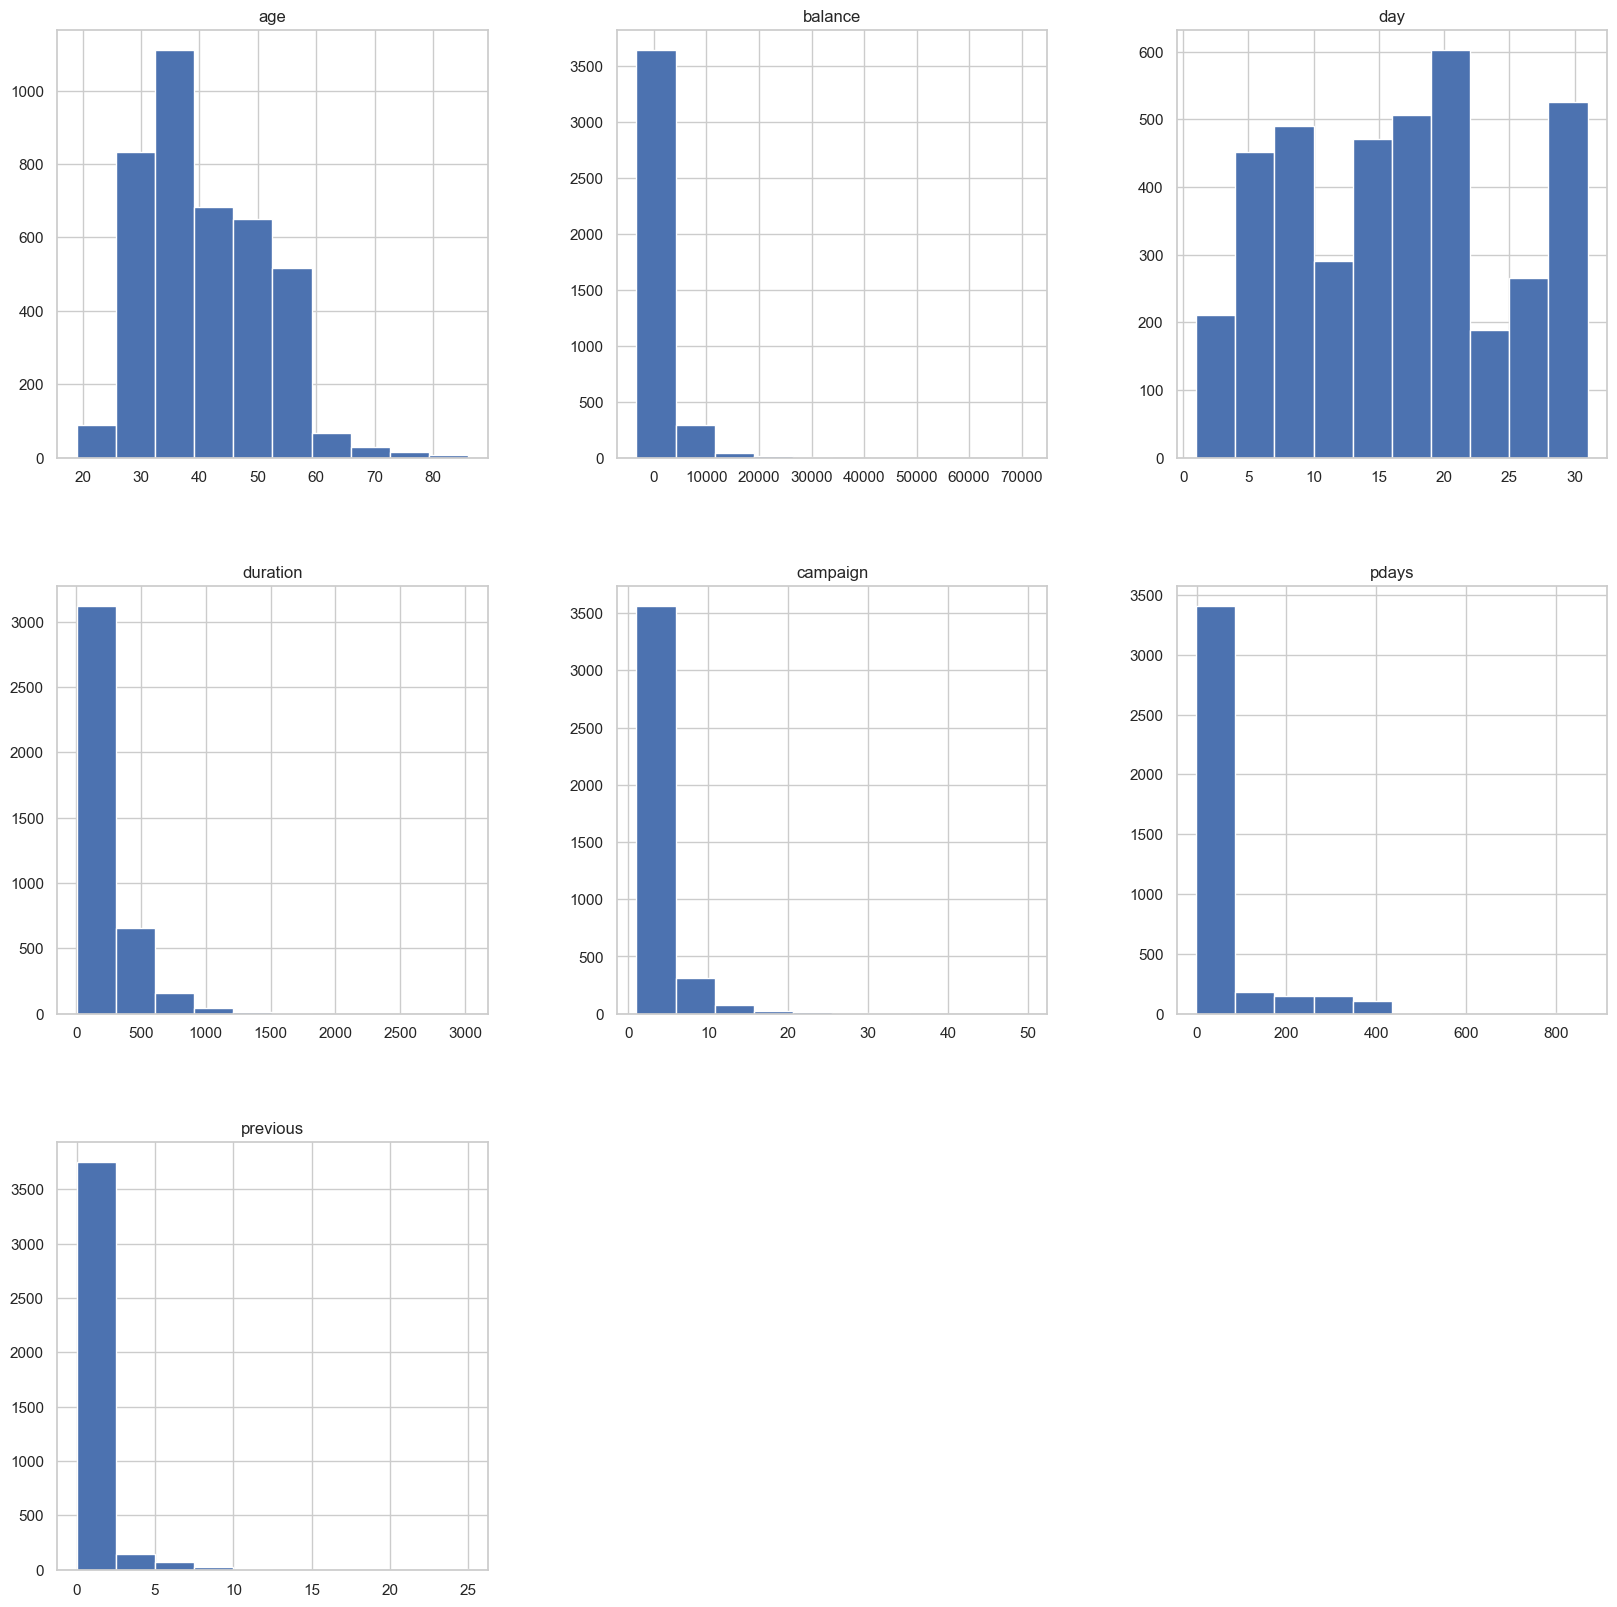

In [26]:
df[df['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')
plt.show()

### DATA PRE-PROCESSING

In [29]:
df.head(10)
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
#View default and is_default columns together
print(df[['default','is_default']].tail(10))

     default  is_default
4511      no           0
4512      no           0
4513      no           0
4514      no           0
4515      no           0
4516      no           0
4517     yes           1
4518      no           0
4519      no           0
4520      no           0


In [32]:
#Convert housing column into numeric value
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
print(df[['housing','is_housing']].tail(10))

     housing  is_housing
4511     yes           1
4512     yes           1
4513      no           0
4514     yes           1
4515     yes           1
4516     yes           1
4517     yes           1
4518      no           0
4519      no           0
4520     yes           1


In [33]:
#Convert loan column into numeric value
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
print(df[['loan', 'is_loan']].tail(10))

     loan  is_loan
4511   no        0
4512   no        0
4513   no        0
4514   no        0
4515   no        0
4516   no        0
4517  yes        1
4518   no        0
4519   no        0
4520  yes        1


In [35]:
#Convert target column ‘y’ into numeric value
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
print(df[['y', 'target']].tail(10))

marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
print(marital_dummies.tail())

        y  target
4511  yes       1
4512   no       0
4513   no       0
4514   no       0
4515   no       0
4516   no       0
4517   no       0
4518   no       0
4519   no       0
4520   no       0
      marital_divorced  marital_married  marital_single
4516                 0                1               0
4517                 0                1               0
4518                 0                1               0
4519                 0                1               0
4520                 0                0               1


In [36]:
#Merge marital_dummies with marital column
print(pd.concat([df['marital'], marital_dummies], axis=1).head(n=10))

   marital  marital_divorced  marital_married  marital_single
0  married                 0                1               0
1  married                 0                1               0
2   single                 0                0               1
3  married                 0                1               0
4  married                 0                1               0
5   single                 0                0               1
6  married                 0                1               0
7  married                 0                1               0
8  married                 0                1               0
9  married                 0                1               0


In [37]:
#Remove marital_divorced column
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
print(marital_dummies.head())

   marital_married  marital_single
0                1               0
1                1               0
2                0               1
3                1               0
4                1               0


In [38]:
#Merge marital_dummies into main dataframe
df = pd.concat([df, marital_dummies], axis=1)
print(df.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... pdays  previous  poutcome   y  is_default is_housing  \
0  cellular   19  ...    -1         0   unknown  no           0          0   
1  cellular   11  ...   339         4   failure  no           0          1   
2  cellular   16  ...   330         1   failure  no           0          1   
3   unknown    3  ...    -1         0   unknown  no           0          1   
4   unknown    5  ...    -1         0   unknown  no           0          1   

  is_loan  target  marital_married  marital_single  
0       0       0                1     

In [39]:
#Creating one hot encoding for education column
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
print(education_dummies.tail())

      education_primary  education_secondary  education_tertiary  \
4516                  0                    1                   0   
4517                  0                    0                   1   
4518                  0                    1                   0   
4519                  0                    1                   0   
4520                  0                    0                   1   

      education_unknown  
4516                  0  
4517                  0  
4518                  0  
4519                  0  
4520                  0  


In [40]:
education_dummies.drop('education_unknown', axis=1, inplace=True)
print(education_dummies.tail())
df = pd.concat([df, education_dummies], axis=1)
print(df.head())

      education_primary  education_secondary  education_tertiary
4516                  0                    1                   0
4517                  0                    0                   1
4518                  0                    1                   0
4519                  0                    1                   0
4520                  0                    0                   1
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ...   y  is_default  is_housing  is_loan  target  \
0  cellular   19  ...  no           0           0        0       0   
1  cellular   11  ...  no      

In [41]:
#Creating one hot encoding for job column
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
print(job_dummies.tail())
job_dummies.drop('job_unknown', axis=1, inplace=True)

#Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
print(df.head())

      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
4516           0                0                 0              0   
4517           0                0                 0              0   
4518           0                0                 0              0   
4519           0                1                 0              0   
4520           0                0                 1              0   

      job_management  job_retired  job_self-employed  job_services  \
4516               0            0                  0             1   
4517               0            0                  1             0   
4518               0            0                  0             0   
4519               0            0                  0             0   
4520               0            0                  0             0   

      job_student  job_technician  job_unemployed  job_unknown  
4516            0               0               0            0  
4517            0           

In [42]:
#Creating one hot encoding for education column
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
print(education_dummies.tail())
education_dummies.drop('education_unknown', axis=1, inplace=True)
print(education_dummies.tail())

df = pd.concat([df, education_dummies], axis=1)
print(df.head())


      education_primary  education_secondary  education_tertiary  \
4516                  0                    1                   0   
4517                  0                    0                   1   
4518                  0                    1                   0   
4519                  0                    1                   0   
4520                  0                    0                   1   

      education_unknown  
4516                  0  
4517                  0  
4518                  0  
4519                  0  
4520                  0  
      education_primary  education_secondary  education_tertiary
4516                  0                    1                   0
4517                  0                    0                   1
4518                  0                    1                   0
4519                  0                    1                   0
4520                  0                    0                   1
   age          job  marital  education defau

In [43]:
#Creating one hot encoding for contact column
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
print(contact_dummies.tail())
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
print(contact_dummies.tail())

df = pd.concat([df, contact_dummies], axis=1)
print(df.head())

      contact_cellular  contact_telephone  contact_unknown
4516                 1                  0                0
4517                 0                  0                1
4518                 1                  0                0
4519                 1                  0                0
4520                 1                  0                0
      contact_cellular  contact_telephone
4516                 1                  0
4517                 0                  0
4518                 1                  0
4519                 1                  0
4520                 1                  0
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married 

In [44]:
#Creating one hot encoding for poutcome column
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
print(poutcome_dummies.tail())
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
print(poutcome_dummies.tail())

df = pd.concat([df, poutcome_dummies], axis=1)
print(df.head())

      poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown
4516                 0               0                 0                 1
4517                 0               0                 0                 1
4518                 0               0                 0                 1
4519                 0               1                 0                 0
4520                 0               1                 0                 0
      poutcome_failure  poutcome_other  poutcome_success
4516                 0               0                 0
4517                 0               0                 0
4518                 0               0                 0
4519                 0               1                 0
4520                 0               1                 0
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     y

In [48]:
#Convert month column into numeric value
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
print(df['month'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: month, dtype: float64


In [54]:
df[df['pdays'] == -1]['pdays'].count()

3705

In [51]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [52]:
print(df[['pdays','was_contacted']].head())

   pdays  was_contacted
0     -1              0
1    339              1
2    330              1
3     -1              0
4     -1              0


In [55]:
#Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

In [56]:
#View After converting all columns into numeric column
print(df.dtypes)
print(df.head(10))

age                      int64
balance                  int64
day                      int64
month                  float64
duration                 int64
campaign                 int64
previous                 int64
is_default               int64
is_housing               int64
is_loan                  int64
target                   int64
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
contact_cellular         uint8
contact_telephone        uint8
poutcome

# Convert into X(features) and y(target)

#### The axis=1 argument drop columns

In [57]:
X = df.drop('target', axis=1)
y = df['target']

#### Shape of X and y

In [58]:
print(X.shape)
print(y.shape)

(4521, 35)
(4521,)


#### Divide features and target into train and test data

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

#### View the shape of X_train, X_test, y_train, y_test

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3616, 35)
(3616,)
(905, 35)
(905,)


## LOGISTIC REGRESSION MODEL

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import the SimpleImputer

# Assuming X_train, X_test, y_train, and y_test are defined

# Create a SimpleImputer to fill missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy="mean")

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')


Predicted value:  [0 0 0 0 0 0 0 0 0 1]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64
Accuracy of the model Logistic Regression is 89.83%


## RANDOM FOREST CLASSIFIER MODEL

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming X_train, X_test, y_train, and y_test are defined

# Create a SimpleImputer to fill missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy="mean")

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of the Random Forest Classifier is {accuracy*100:.2f}%')


Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64
Accuracy of the Random Forest Classifier is 91.60%


## SVC MODEL

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming X_train, X_test, y_train, and y_test are defined

# Create a SimpleImputer to fill missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy="mean")

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Train the Support Vector Classifier (SVC)
model = SVC()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of the Support Vector Classifier is {accuracy*100:.2f}%')


Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64
Accuracy of the Support Vector Classifier is 89.61%


## DECISION TREE CLASSIFIER MODEL

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming X_train, X_test, y_train, and y_test are defined

# Create a SimpleImputer to fill missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy="mean")

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of the Decision Tree Classifier is {accuracy*100:.2f}%')


Predicted value:  [0 0 0 0 0 0 0 0 0 1]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64
Accuracy of the Decision Tree Classifier is 86.63%


## PIPELINE MODEL

In [73]:
from sklearn.pipeline import make_pipeline
clf = SVC()  # Choose your desired classifier
pipeline_model = make_pipeline(StandardScaler(), clf)
# Model Training and Evaluation
clf= HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
# Make Predictions on the validation set
y_pred = clf.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
# Cross-Validation using Pipelining
k_fold = KFold(n_splits=10, random_state=7, shuffle=True)

results = cross_val_score(clf, X, y, cv=k_fold)
print("Accuracy from Cross-Validation: %.2f%%" % (results.mean() * 100))

Accuracy: 90.72%
Confusion Matrix:
 [[784  27]
 [ 57  37]]
Accuracy from Cross-Validation: 89.45%


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate random data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Classifier (SVC)
model = SVC()
model.fit(X_train, y_train)

# Scale the test data using the same scaler as the training data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Evaluate the model
print("All predictions done successfully by SVM Machine Learning Algorithm")
print("\n\nAccuracy score %f" % accuracy_score(y_test, predictions))
print("\n\nConfusion matrix:\n")
print(confusion_matrix(y_test, predictions))


All predictions done successfully by SVM Machine Learning Algorithm


Accuracy score 1.000000


Confusion matrix:

[[ 9  0]
 [ 0 11]]


In [7]:
import joblib
filename = "finalized_BrainTumor_model.sav"
joblib.dump(model, filename)
print( "Model dumped successfully into a file by Joblib")

Model dumped successfully into a file by Joblib
